<a href="https://colab.research.google.com/github/mikemykhaylov/mat422Coursework/blob/main/3_5_6_K_Means_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy seaborn scipy matplotlib ipympl pillow scikit-learn requests sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
%matplotlib widget

# 3.5: K-Means Clustering

k-means clustering is a method that partitions n observations into k clusters where each observation belongs to the cluster with the nearest mean.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


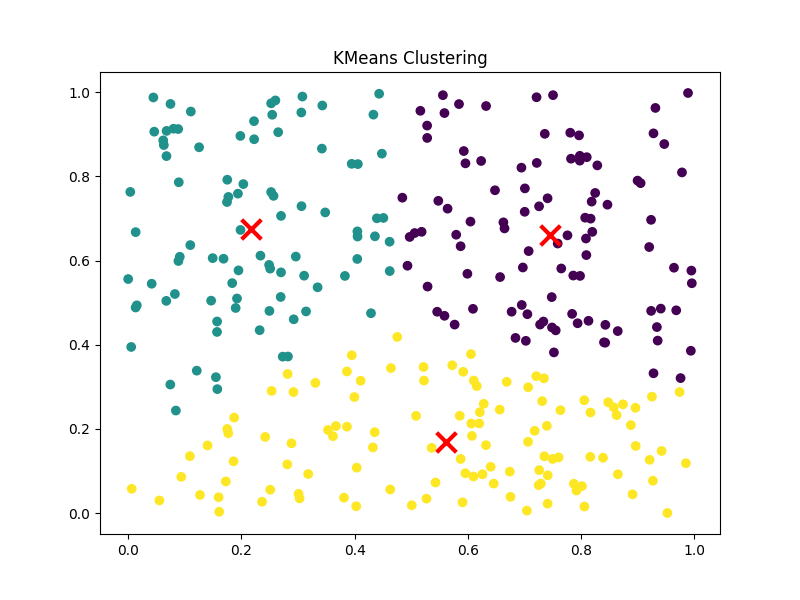

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
data = np.random.rand(300, 2)

# KMeans clustering
kmeans = KMeans(n_clusters=3).fit(data)
labels = kmeans.labels_

# Visualizing clusters
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', zorder=10)
plt.title('KMeans Clustering')
plt.show()

# 3.6: Support Vector Machines

Support-vector machines (SVMs) are supervised learning models which aim to analyze data for classification and regression. The goal is to find a hyperplane that distinctly classifies the data points.

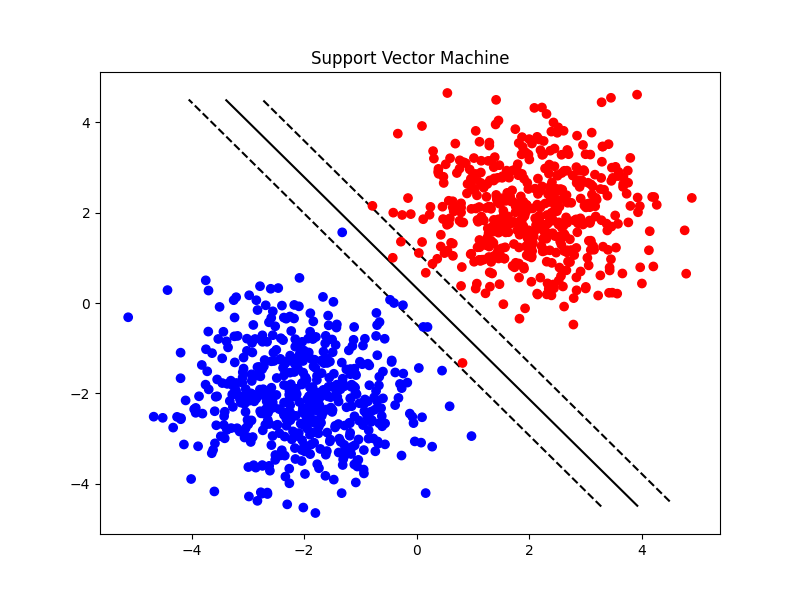

In [5]:
from sklearn.svm import SVC

# Generate some linearly separable data
X = np.r_[np.random.randn(500, 2) - [2, 2], np.random.randn(500, 2) + [2, 2]]
Y = [-1] * 500 + [1] * 500

# Train SVM
clf = SVC(kernel='linear')
clf.fit(X, Y)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.bwr)
plt.axis('tight')
x_min, x_max = -4.5, 4.5
y_min, y_max = -4.5, 4.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', zorder=10)
plt.title('Support Vector Machine')
plt.show()